### Auswertung

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def generate_dataframes(all_results):
    column_names = []
    means_results = []
    ratios_results = []
    approx_ratios_results = []

    for item in all_results.items():
        name, res = item
        column_names.append(name)

        m = [np.median(l) for l in res[0]]
        means_results.append(m.copy())

        m = [np.median(l) for l in res[1]]
        ratios_results.append(m.copy())

        m = [np.median(l) for l in res[2]]
        approx_ratios_results.append(m.copy())

    means_results = np.stack(means_results, axis=1)
    ratios_results = np.stack(ratios_results, axis=1)
    approx_ratios_results = np.stack(approx_ratios_results, axis=1)
    
    means_df = pd.DataFrame(means_results, columns=column_names)
    # start index = p at 1
    means_df.index = np.arange( 1, len(means_df) + 1)
    means_df.index.name = "p"
    # round 
    means_df = means_df.round(2)
    
    ratio_df = pd.DataFrame(ratios_results, columns=column_names)
    # start index = p at 1
    ratio_df.index = np.arange( 1, len(ratio_df) + 1)
    ratio_df.index.name = "p"
    # round 
    ratio_df = ratio_df.round(2)
    
    approx_ratios_df = pd.DataFrame(approx_ratios_results, columns=column_names)
    # start index = p at 1
    approx_ratios_df.index = np.arange( 1, len(approx_ratios_df) + 1)
    approx_ratios_df.index.name = "p"
    # round 
    approx_ratios_df = approx_ratios_df.round(2)
    
    return means_df, ratio_df, approx_ratios_df

In [31]:
import pickle
def load_data(filepath):
    tmp_data = np.load(filepath, allow_pickle=True)
    tmp_data = tmp_data.flatten()[0]
    return generate_dataframes(tmp_data)

In [32]:
import glob
def load_all_data(path):
    data = {}
    for file in glob.glob(f'{path}/comparison*.npy'):
        if '_w_' in file:
            name = file.split('0')[1][0] + 'w'
        else:
            name = file.split('0')[1][0]
        
        data[name] = load_data(file)
    return data 

In [33]:
MEAN = 0
RATIO = 1
AR = 2
def create_ar_df(data):
    tt= []
    for key in sorted(data.keys()):
        value = data[key]
        tmpdf = pd.DataFrame(value[AR].median(), columns=[f"{key}"])
        tt.append(tmpdf)
    ar_pd = tt.pop(0)
    for t in tt:
        ar_pd = ar_pd.join(t)
    ar_pd = ar_pd.T
    ar_pd.index.name = "Graph"
    # rename columns
    ar_pd.rename(columns={'TQA QAOA':'TQA-QAOA','WarmStart QAOA': 'WS-QAOA', 'Recursive QAOA': 'R-QAOA', 'Recursive WarmStart QAOA': 'WS-R-QAOA'}, inplace=True)
    return ar_pd

### Simulation IBM

In [34]:
sim_data = load_all_data("simulator_ibm/notebooks")
sim_ar_df = create_ar_df(sim_data)
sim_ar_df

,QAOA,TQA-QAOA,WS-QAOA,R-QAOA,WS-R-QAOA
Graph,,,,,
4,0.965,0.910,1.0,1.0,1.00
4w,0.890,0.885,1.0,1.0,1.00
5,0.980,0.980,1.0,1.0,1.00
5w,0.875,0.875,1.0,1.0,1.00
6,0.880,0.890,1.0,1.0,1.00
6w,0.770,0.785,1.0,1.0,1.00
8,0.845,0.835,1.0,1.0,1.00
8w,0.670,0.715,1.0,1.0,0.98


In [35]:
print(sim_ar_df.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &   QAOA &  TQA-QAOA &  WS-QAOA &  R-QAOA &  WS-R-QAOA \\
Graph &        &           &          &         &            \\
\midrule
4     &  0.965 &     0.910 &      1.0 &     1.0 &       1.00 \\
4w    &  0.890 &     0.885 &      1.0 &     1.0 &       1.00 \\
5     &  0.980 &     0.980 &      1.0 &     1.0 &       1.00 \\
5w    &  0.875 &     0.875 &      1.0 &     1.0 &       1.00 \\
6     &  0.880 &     0.890 &      1.0 &     1.0 &       1.00 \\
6w    &  0.770 &     0.785 &      1.0 &     1.0 &       1.00 \\
8     &  0.845 &     0.835 &      1.0 &     1.0 &       1.00 \\
8w    &  0.670 &     0.715 &      1.0 &     1.0 &       0.98 \\
\bottomrule
\end{tabular}



### Simulation IBM with fixed points

In [36]:
sim_init_data = load_all_data("simulator_ibm_init/notebooks")
sim_init_ar_df = create_ar_df(sim_init_data)
sim_init_ar_df

,QAOA,TQA-QAOA,WS-QAOA,R-QAOA,WS-R-QAOA
Graph,,,,,
4,1.000,0.315,1.0,NaN,1.00
4w,0.955,0.635,1.0,1.000,1.00
5,1.000,0.505,1.0,1.000,1.00
5w,0.940,0.565,1.0,0.985,1.00
6,0.950,0.390,1.0,0.430,1.00
6w,0.880,0.645,1.0,1.000,1.00
8,0.900,0.385,1.0,0.800,1.00
8w,0.825,0.560,1.0,1.000,0.98


In [37]:
print(sim_init_ar_df.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &   QAOA &  TQA-QAOA &  WS-QAOA &  R-QAOA &  WS-R-QAOA \\
Graph &        &           &          &         &            \\
\midrule
4     &  1.000 &     0.315 &      1.0 &     NaN &       1.00 \\
4w    &  0.955 &     0.635 &      1.0 &   1.000 &       1.00 \\
5     &  1.000 &     0.505 &      1.0 &   1.000 &       1.00 \\
5w    &  0.940 &     0.565 &      1.0 &   0.985 &       1.00 \\
6     &  0.950 &     0.390 &      1.0 &   0.430 &       1.00 \\
6w    &  0.880 &     0.645 &      1.0 &   1.000 &       1.00 \\
8     &  0.900 &     0.385 &      1.0 &   0.800 &       1.00 \\
8w    &  0.825 &     0.560 &      1.0 &   1.000 &       0.98 \\
\bottomrule
\end{tabular}



### Simulation AQT

In [38]:
sim_aqt_data = load_all_data("simulator_aqt/notebooks")
sim_aqt_ar_df = create_ar_df(sim_aqt_data)
sim_aqt_ar_df

,QAOA,TQA-QAOA,WS-QAOA,R-QAOA,WS-R-QAOA
Graph,,,,,
4,0.935,0.875,1.0,1.00,1.00
4w,0.865,0.865,1.0,1.00,1.00
5,0.955,0.960,1.0,1.00,1.00
5w,0.845,0.840,1.0,1.00,1.00
6,0.840,0.835,1.0,1.00,1.00
6w,0.735,0.760,1.0,1.00,1.00
8,0.805,0.790,1.0,1.00,1.00
8w,0.650,0.675,1.0,0.98,0.98


In [39]:
print(sim_aqt_ar_df.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &   QAOA &  TQA-QAOA &  WS-QAOA &  R-QAOA &  WS-R-QAOA \\
Graph &        &           &          &         &            \\
\midrule
4     &  0.935 &     0.875 &      1.0 &    1.00 &       1.00 \\
4w    &  0.865 &     0.865 &      1.0 &    1.00 &       1.00 \\
5     &  0.955 &     0.960 &      1.0 &    1.00 &       1.00 \\
5w    &  0.845 &     0.840 &      1.0 &    1.00 &       1.00 \\
6     &  0.840 &     0.835 &      1.0 &    1.00 &       1.00 \\
6w    &  0.735 &     0.760 &      1.0 &    1.00 &       1.00 \\
8     &  0.805 &     0.790 &      1.0 &    1.00 &       1.00 \\
8w    &  0.650 &     0.675 &      1.0 &    0.98 &       0.98 \\
\bottomrule
\end{tabular}



### Simulation AQT with fixed points

In [40]:
sim_aqt_init_data = load_all_data("simulator_aqt_init/notebooks")
sim_aqt_init_ar_df = create_ar_df(sim_aqt_init_data)
sim_aqt_init_ar_df

,QAOA,TQA-QAOA,WS-QAOA,R-QAOA,WS-R-QAOA
Graph,,,,,
4,1.000,1.000,1.0,1.00,1.00
4w,0.955,0.955,1.0,1.00,1.00
5,1.000,1.000,1.0,1.00,1.00
5w,0.940,0.935,1.0,0.98,1.00
6,0.950,0.955,1.0,0.43,1.00
6w,0.880,0.880,1.0,1.00,1.00
8,0.900,0.900,1.0,0.80,1.00
8w,0.825,0.825,1.0,1.00,0.98


In [41]:
print(sim_aqt_init_ar_df.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &   QAOA &  TQA-QAOA &  WS-QAOA &  R-QAOA &  WS-R-QAOA \\
Graph &        &           &          &         &            \\
\midrule
4     &  1.000 &     1.000 &      1.0 &    1.00 &       1.00 \\
4w    &  0.955 &     0.955 &      1.0 &    1.00 &       1.00 \\
5     &  1.000 &     1.000 &      1.0 &    1.00 &       1.00 \\
5w    &  0.940 &     0.935 &      1.0 &    0.98 &       1.00 \\
6     &  0.950 &     0.955 &      1.0 &    0.43 &       1.00 \\
6w    &  0.880 &     0.880 &      1.0 &    1.00 &       1.00 \\
8     &  0.900 &     0.900 &      1.0 &    0.80 &       1.00 \\
8w    &  0.825 &     0.825 &      1.0 &    1.00 &       0.98 \\
\bottomrule
\end{tabular}



### Noise AQT with fixed points

In [42]:
noise_aqt_init_data = load_all_data("noise_aqt/notebooks")
noise_aqt_init_ar_df = create_ar_df(noise_aqt_init_data)
noise_aqt_init_ar_df

,QAOA,TQA-QAOA,WS-QAOA,R-QAOA,WS-R-QAOA
Graph,,,,,
4,0.830,0.595,0.890,1.000,1.0
4w,0.795,0.665,0.850,0.975,1.0
5,0.850,0.660,0.865,1.000,1.0
5w,0.825,0.625,0.805,0.910,1.0
6,0.750,0.565,0.775,0.430,1.0
6w,0.735,0.625,0.785,1.000,1.0
8,0.735,0.535,0.745,0.825,1.0
8w,0.700,0.565,0.740,0.990,1.0


In [43]:
print(noise_aqt_init_ar_df.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &   QAOA &  TQA-QAOA &  WS-QAOA &  R-QAOA &  WS-R-QAOA \\
Graph &        &           &          &         &            \\
\midrule
4     &  0.830 &     0.595 &    0.890 &   1.000 &        1.0 \\
4w    &  0.795 &     0.665 &    0.850 &   0.975 &        1.0 \\
5     &  0.850 &     0.660 &    0.865 &   1.000 &        1.0 \\
5w    &  0.825 &     0.625 &    0.805 &   0.910 &        1.0 \\
6     &  0.750 &     0.565 &    0.775 &   0.430 &        1.0 \\
6w    &  0.735 &     0.625 &    0.785 &   1.000 &        1.0 \\
8     &  0.735 &     0.535 &    0.745 &   0.825 &        1.0 \\
8w    &  0.700 &     0.565 &    0.740 &   0.990 &        1.0 \\
\bottomrule
\end{tabular}



### Noise AQT SPAMEM with fixed points

In [44]:
noise_aqt_init_em_data = load_all_data("noise_aqt_em/notebooks")
noise_aqt_init_em_ar_df = create_ar_df(noise_aqt_init_em_data)
noise_aqt_init_em_ar_df

,QAOA,TQA-QAOA,WS-QAOA,R-QAOA,WS-R-QAOA
Graph,,,,,
4,0.840,0.595,0.590,1.000,1.0
4w,0.800,0.665,0.425,0.900,1.0
5,0.860,0.660,0.650,1.000,1.0
5w,0.815,0.630,0.605,0.925,1.0
6,0.755,0.565,0.515,0.430,1.0
6w,0.735,0.630,0.590,1.000,1.0
8,0.735,0.535,0.495,0.750,1.0
8w,0.705,0.565,0.560,0.990,1.0


In [45]:
print(noise_aqt_init_em_ar_df.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &   QAOA &  TQA-QAOA &  WS-QAOA &  R-QAOA &  WS-R-QAOA \\
Graph &        &           &          &         &            \\
\midrule
4     &  0.840 &     0.595 &    0.590 &   1.000 &        1.0 \\
4w    &  0.800 &     0.665 &    0.425 &   0.900 &        1.0 \\
5     &  0.860 &     0.660 &    0.650 &   1.000 &        1.0 \\
5w    &  0.815 &     0.630 &    0.605 &   0.925 &        1.0 \\
6     &  0.755 &     0.565 &    0.515 &   0.430 &        1.0 \\
6w    &  0.735 &     0.630 &    0.590 &   1.000 &        1.0 \\
8     &  0.735 &     0.535 &    0.495 &   0.750 &        1.0 \\
8w    &  0.705 &     0.565 &    0.560 &   0.990 &        1.0 \\
\bottomrule
\end{tabular}



### Noise AQT GEM with fixed points

In [46]:
noise_aqt_init_gem_data = load_all_data("noise_aqt_gem/notebooks")
noise_aqt_init_gem_ar_df = create_ar_df(noise_aqt_init_gem_data)
noise_aqt_init_gem_ar_df

,QAOA,TQA-QAOA,WS-QAOA,R-QAOA,WS-R-QAOA
Graph,,,,,
4,0.880,0.405,0.895,0.875,1.000
4w,0.815,0.590,0.995,0.850,0.975
5,0.830,0.570,0.825,1.000,1.000
5w,0.870,0.575,0.890,0.600,1.000
6,0.785,0.360,0.960,0.785,1.000
6w,0.760,0.570,0.995,0.970,1.000
8,0.650,0.365,0.975,0.750,1.000
8w,0.465,0.430,0.970,0.880,1.000


In [47]:
print(noise_aqt_init_gem_ar_df.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &   QAOA &  TQA-QAOA &  WS-QAOA &  R-QAOA &  WS-R-QAOA \\
Graph &        &           &          &         &            \\
\midrule
4     &  0.880 &     0.405 &    0.895 &   0.875 &      1.000 \\
4w    &  0.815 &     0.590 &    0.995 &   0.850 &      0.975 \\
5     &  0.830 &     0.570 &    0.825 &   1.000 &      1.000 \\
5w    &  0.870 &     0.575 &    0.890 &   0.600 &      1.000 \\
6     &  0.785 &     0.360 &    0.960 &   0.785 &      1.000 \\
6w    &  0.760 &     0.570 &    0.995 &   0.970 &      1.000 \\
8     &  0.650 &     0.365 &    0.975 &   0.750 &      1.000 \\
8w    &  0.465 &     0.430 &    0.970 &   0.880 &      1.000 \\
\bottomrule
\end{tabular}



### Noise IBM with fixed points

In [48]:
noise_init_data = load_all_data("noise_ibm/notebooks")
noise_init_ar_df = create_ar_df(noise_init_data)
noise_init_ar_df

,QAOA,TQA-QAOA,WS-QAOA,R-QAOA,WS-R-QAOA
Graph,,,,,
4,0.830,0.595,0.855,NaN,1.0
4w,0.790,0.700,0.825,1.000,1.0
5,0.850,0.645,0.850,1.000,1.0
5w,0.800,0.660,0.835,0.985,1.0
6,0.720,0.580,0.715,0.430,1.0
6w,0.705,0.630,0.715,1.000,1.0
8,0.655,0.560,0.660,0.800,1.0
8w,0.625,0.575,0.640,1.000,1.0


In [49]:
print(noise_init_ar_df.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &   QAOA &  TQA-QAOA &  WS-QAOA &  R-QAOA &  WS-R-QAOA \\
Graph &        &           &          &         &            \\
\midrule
4     &  0.830 &     0.595 &    0.855 &     NaN &        1.0 \\
4w    &  0.790 &     0.700 &    0.825 &   1.000 &        1.0 \\
5     &  0.850 &     0.645 &    0.850 &   1.000 &        1.0 \\
5w    &  0.800 &     0.660 &    0.835 &   0.985 &        1.0 \\
6     &  0.720 &     0.580 &    0.715 &   0.430 &        1.0 \\
6w    &  0.705 &     0.630 &    0.715 &   1.000 &        1.0 \\
8     &  0.655 &     0.560 &    0.660 &   0.800 &        1.0 \\
8w    &  0.625 &     0.575 &    0.640 &   1.000 &        1.0 \\
\bottomrule
\end{tabular}



### Noise IBM SPAMEM with fixed points

In [50]:
noise_init_em_data = load_all_data("noise_ibm_em/notebooks")
noise_init_em_ar_df = create_ar_df(noise_init_em_data)
noise_init_em_ar_df

,QAOA,TQA-QAOA,WS-QAOA,R-QAOA,WS-R-QAOA
Graph,,,,,
4,0.850,0.580,0.880,NaN,1.0
4w,0.805,0.705,0.845,1.000,1.0
5,0.870,0.625,0.850,1.000,1.0
5w,0.810,0.655,0.850,0.985,1.0
6,0.730,0.575,0.725,0.430,1.0
6w,0.715,0.635,0.720,1.000,1.0
8,0.660,0.560,0.690,0.800,1.0
8w,0.630,0.575,0.670,1.000,1.0


In [51]:
print(noise_init_em_ar_df.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &   QAOA &  TQA-QAOA &  WS-QAOA &  R-QAOA &  WS-R-QAOA \\
Graph &        &           &          &         &            \\
\midrule
4     &  0.850 &     0.580 &    0.880 &     NaN &        1.0 \\
4w    &  0.805 &     0.705 &    0.845 &   1.000 &        1.0 \\
5     &  0.870 &     0.625 &    0.850 &   1.000 &        1.0 \\
5w    &  0.810 &     0.655 &    0.850 &   0.985 &        1.0 \\
6     &  0.730 &     0.575 &    0.725 &   0.430 &        1.0 \\
6w    &  0.715 &     0.635 &    0.720 &   1.000 &        1.0 \\
8     &  0.660 &     0.560 &    0.690 &   0.800 &        1.0 \\
8w    &  0.630 &     0.575 &    0.670 &   1.000 &        1.0 \\
\bottomrule
\end{tabular}



### Noise IBM GEM with fixed points

In [52]:
noise_init_gem_data = load_all_data("noise_ibm_gem/notebooks")
noise_init_gem_ar_df = create_ar_df(noise_init_gem_data)
noise_init_gem_ar_df

,QAOA,TQA-QAOA,WS-QAOA,R-QAOA,WS-R-QAOA
Graph,,,,,
4,0.945,0.295,0.985,0.000,1.0
4w,0.905,0.720,0.975,1.000,1.0
5,0.975,0.465,1.000,1.000,1.0
5w,0.935,0.610,0.975,0.945,1.0
6,0.885,0.465,0.940,0.430,1.0
6w,0.855,0.660,0.935,1.000,1.0
8,0.790,0.460,0.940,0.750,1.0
8w,0.745,0.575,0.935,1.000,1.0


In [53]:
print(noise_init_gem_ar_df.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &   QAOA &  TQA-QAOA &  WS-QAOA &  R-QAOA &  WS-R-QAOA \\
Graph &        &           &          &         &            \\
\midrule
4     &  0.945 &     0.295 &    0.985 &   0.000 &        1.0 \\
4w    &  0.905 &     0.720 &    0.975 &   1.000 &        1.0 \\
5     &  0.975 &     0.465 &    1.000 &   1.000 &        1.0 \\
5w    &  0.935 &     0.610 &    0.975 &   0.945 &        1.0 \\
6     &  0.885 &     0.465 &    0.940 &   0.430 &        1.0 \\
6w    &  0.855 &     0.660 &    0.935 &   1.000 &        1.0 \\
8     &  0.790 &     0.460 &    0.940 &   0.750 &        1.0 \\
8w    &  0.745 &     0.575 &    0.935 &   1.000 &        1.0 \\
\bottomrule
\end{tabular}



### Vergleich QAOA Varianten (Sim IBM)

<AxesSubplot:xlabel='Graph', ylabel='Approximation Ratio'>

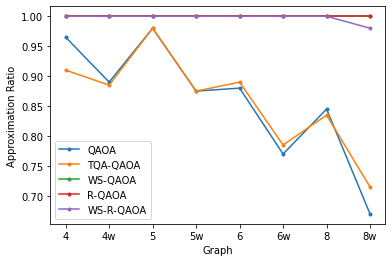

In [54]:
sim_ar_df.plot(marker='.', ylabel="Approximation Ratio", xlabel="Graph")

WS, R, WSR bei allen Graphen gleich gut. 

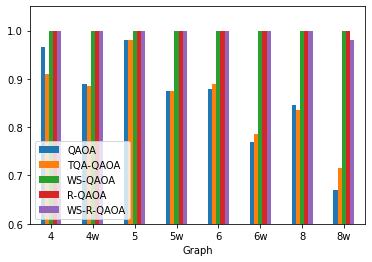

In [55]:
sim_ar_df.plot(kind="bar", ylim=[0.6,1.05])
plt.legend(loc=3)
plt.xticks(rotation=0)
plt.show()

In [56]:
sim_ar_df

,QAOA,TQA-QAOA,WS-QAOA,R-QAOA,WS-R-QAOA
Graph,,,,,
4,0.965,0.910,1.0,1.0,1.00
4w,0.890,0.885,1.0,1.0,1.00
5,0.980,0.980,1.0,1.0,1.00
5w,0.875,0.875,1.0,1.0,1.00
6,0.880,0.890,1.0,1.0,1.00
6w,0.770,0.785,1.0,1.0,1.00
8,0.845,0.835,1.0,1.0,1.00
8w,0.670,0.715,1.0,1.0,0.98


In [57]:
print(sim_ar_df.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &   QAOA &  TQA-QAOA &  WS-QAOA &  R-QAOA &  WS-R-QAOA \\
Graph &        &           &          &         &            \\
\midrule
4     &  0.965 &     0.910 &      1.0 &     1.0 &       1.00 \\
4w    &  0.890 &     0.885 &      1.0 &     1.0 &       1.00 \\
5     &  0.980 &     0.980 &      1.0 &     1.0 &       1.00 \\
5w    &  0.875 &     0.875 &      1.0 &     1.0 &       1.00 \\
6     &  0.880 &     0.890 &      1.0 &     1.0 &       1.00 \\
6w    &  0.770 &     0.785 &      1.0 &     1.0 &       1.00 \\
8     &  0.845 &     0.835 &      1.0 &     1.0 &       1.00 \\
8w    &  0.670 &     0.715 &      1.0 &     1.0 &       0.98 \\
\bottomrule
\end{tabular}



### Vergleich QAOA Varianten (Sim AQT)

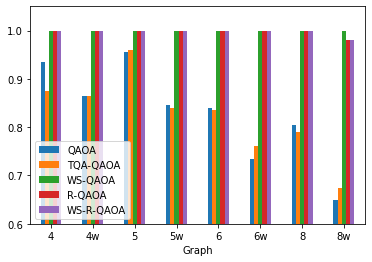

In [58]:
sim_aqt_ar_df.plot(kind="bar", ylim=[0.6,1.05])
plt.legend(loc=3)
plt.xticks(rotation=0)
plt.show()

<AxesSubplot:xlabel='Graph', ylabel='Approximation Ratio'>

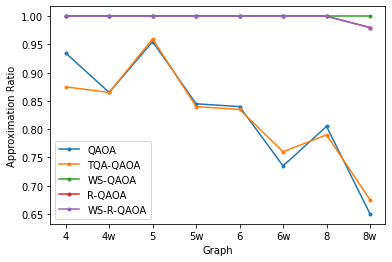

In [59]:
sim_aqt_ar_df.plot(marker='.', ylabel="Approximation Ratio", xlabel="Graph")

In [60]:
sim_aqt_ar_df

,QAOA,TQA-QAOA,WS-QAOA,R-QAOA,WS-R-QAOA
Graph,,,,,
4,0.935,0.875,1.0,1.00,1.00
4w,0.865,0.865,1.0,1.00,1.00
5,0.955,0.960,1.0,1.00,1.00
5w,0.845,0.840,1.0,1.00,1.00
6,0.840,0.835,1.0,1.00,1.00
6w,0.735,0.760,1.0,1.00,1.00
8,0.805,0.790,1.0,1.00,1.00
8w,0.650,0.675,1.0,0.98,0.98


In [61]:
print(sim_aqt_ar_df.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &   QAOA &  TQA-QAOA &  WS-QAOA &  R-QAOA &  WS-R-QAOA \\
Graph &        &           &          &         &            \\
\midrule
4     &  0.935 &     0.875 &      1.0 &    1.00 &       1.00 \\
4w    &  0.865 &     0.865 &      1.0 &    1.00 &       1.00 \\
5     &  0.955 &     0.960 &      1.0 &    1.00 &       1.00 \\
5w    &  0.845 &     0.840 &      1.0 &    1.00 &       1.00 \\
6     &  0.840 &     0.835 &      1.0 &    1.00 &       1.00 \\
6w    &  0.735 &     0.760 &      1.0 &    1.00 &       1.00 \\
8     &  0.805 &     0.790 &      1.0 &    1.00 &       1.00 \\
8w    &  0.650 &     0.675 &      1.0 &    0.98 &       0.98 \\
\bottomrule
\end{tabular}



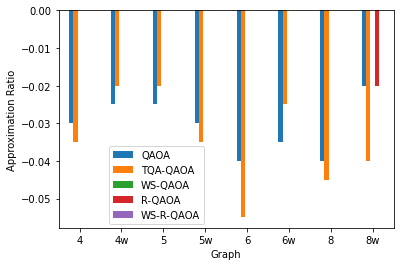

In [62]:
(sim_aqt_ar_df - sim_ar_df).plot(kind="bar", ylabel="Approximation Ratio")
plt.xticks(rotation=0)
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.4))
plt.show()

In [63]:
(sim_aqt_ar_df - sim_ar_df).mean()

QAOA        -0.030625
TQA-QAOA    -0.034375
WS-QAOA      0.000000
R-QAOA      -0.002500
WS-R-QAOA    0.000000
dtype: float64

In [64]:
print((sim_aqt_ar_df - sim_ar_df).to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &   QAOA &  TQA-QAOA &  WS-QAOA &  R-QAOA &  WS-R-QAOA \\
Graph &        &           &          &         &            \\
\midrule
4     & -0.030 &    -0.035 &      0.0 &    0.00 &        0.0 \\
4w    & -0.025 &    -0.020 &      0.0 &    0.00 &        0.0 \\
5     & -0.025 &    -0.020 &      0.0 &    0.00 &        0.0 \\
5w    & -0.030 &    -0.035 &      0.0 &    0.00 &        0.0 \\
6     & -0.040 &    -0.055 &      0.0 &    0.00 &        0.0 \\
6w    & -0.035 &    -0.025 &      0.0 &    0.00 &        0.0 \\
8     & -0.040 &    -0.045 &      0.0 &    0.00 &        0.0 \\
8w    & -0.020 &    -0.040 &      0.0 &   -0.02 &        0.0 \\
\bottomrule
\end{tabular}



### Vergleich von QAOA vs TQA (Sim IBM)

<AxesSubplot:xlabel='Graph', ylabel='Approximation Ratio'>

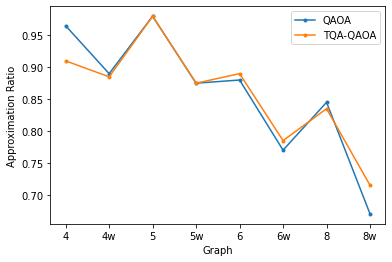

In [65]:
df = sim_ar_df.iloc[:, 0:2]
df.plot(marker='.', ylabel="Approximation Ratio", xlabel="Graph")

### Vergleich von QAOA vs TQA (Sim AQT)

<AxesSubplot:xlabel='Graph', ylabel='Approximation Ratio'>

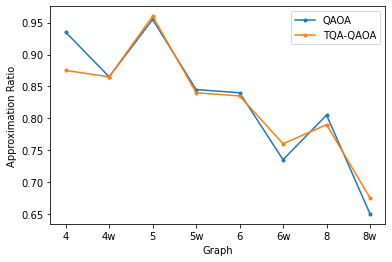

In [66]:
df = sim_aqt_ar_df.iloc[:, 0:2]
df.plot(marker='.', ylabel="Approximation Ratio", xlabel="Graph")

In [67]:
print(df.mean())
print()
print(df.mean()[0] - df.mean()[1])

QAOA        0.82875
TQA-QAOA    0.82500
dtype: float64

0.003750000000000031


### Vergleich der QAOA Varianten IBM (fixed points + Noise)

<AxesSubplot:ylabel='Approximation Ratio'>

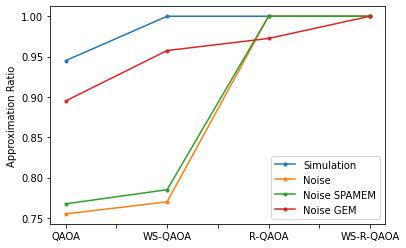

In [68]:
df = pd.DataFrame(sim_init_ar_df.median(), columns=["Simulation"]) \
.join(pd.DataFrame(noise_init_ar_df.median(), columns=["Noise"])) \
.join(pd.DataFrame(noise_init_em_ar_df.median(), columns=["Noise SPAMEM"])) \
.join(pd.DataFrame(noise_init_gem_ar_df.median(), columns=["Noise GEM"])) 
df = df.drop('TQA-QAOA')
df.plot(marker='.', ylabel="Approximation Ratio", xlabel="")

In [69]:
df

,Simulation,Noise,Noise SPAMEM,Noise GEM
QAOA,0.945,0.755,0.7675,0.8950
WS-QAOA,1.000,0.770,0.7850,0.9575
R-QAOA,1.000,1.000,1.0000,0.9725
WS-R-QAOA,1.000,1.000,1.0000,1.0000


In [70]:
print(df.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  Simulation &  Noise &  Noise SPAMEM &  Noise GEM \\
\midrule
QAOA      &       0.945 &  0.755 &        0.7675 &     0.8950 \\
WS-QAOA   &       1.000 &  0.770 &        0.7850 &     0.9575 \\
R-QAOA    &       1.000 &  1.000 &        1.0000 &     0.9725 \\
WS-R-QAOA &       1.000 &  1.000 &        1.0000 &     1.0000 \\
\bottomrule
\end{tabular}



In [71]:
df1 = df.copy()

Ohne TQA, da es keinen Sinn macht, da die fixen points die besten Ergebnisse wiederspiegeln! 

### Vergleich der QAOA Varianten AQT (fixed points + Noise)

<AxesSubplot:ylabel='Approximation Ratio'>

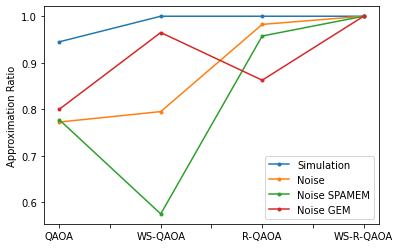

In [72]:
df = pd.DataFrame(sim_aqt_init_ar_df.median(), columns=["Simulation"]) \
.join(pd.DataFrame(noise_aqt_init_ar_df.median(), columns=["Noise"])) \
.join(pd.DataFrame(noise_aqt_init_em_ar_df.median(), columns=["Noise SPAMEM"])) \
.join(pd.DataFrame(noise_aqt_init_gem_ar_df.median(), columns=["Noise GEM"])) 
df = df.drop('TQA-QAOA')
df.plot(marker='.', ylabel="Approximation Ratio", xlabel="")

In [73]:
df

,Simulation,Noise,Noise SPAMEM,Noise GEM
QAOA,0.945,0.7725,0.7775,0.8000
WS-QAOA,1.000,0.7950,0.5750,0.9650
R-QAOA,1.000,0.9825,0.9575,0.8625
WS-R-QAOA,1.000,1.0000,1.0000,1.0000


In [74]:
print(df.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  Simulation &   Noise &  Noise SPAMEM &  Noise GEM \\
\midrule
QAOA      &       0.945 &  0.7725 &        0.7775 &     0.8000 \\
WS-QAOA   &       1.000 &  0.7950 &        0.5750 &     0.9650 \\
R-QAOA    &       1.000 &  0.9825 &        0.9575 &     0.8625 \\
WS-R-QAOA &       1.000 &  1.0000 &        1.0000 &     1.0000 \\
\bottomrule
\end{tabular}



### Vergleich AQT vs. IBM: alle Varianten 

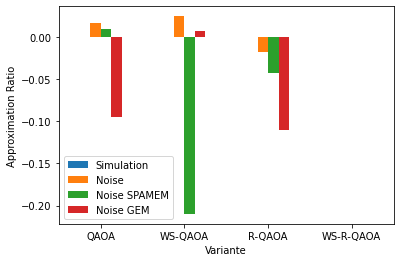

In [75]:
(df - df1).plot(kind="bar",ylabel="Approximation Ratio",xlabel="Variante")
plt.xticks(rotation=0)
plt.show()

In [76]:
(df - df1)

,Simulation,Noise,Noise SPAMEM,Noise GEM
QAOA,0.0,0.0175,0.0100,-0.0950
WS-QAOA,0.0,0.0250,-0.2100,0.0075
R-QAOA,0.0,-0.0175,-0.0425,-0.1100
WS-R-QAOA,0.0,0.0000,0.0000,0.0000


In [77]:
print((df - df1).to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  Simulation &   Noise &  Noise SPAMEM &  Noise GEM \\
\midrule
QAOA      &         0.0 &  0.0175 &        0.0100 &    -0.0950 \\
WS-QAOA   &         0.0 &  0.0250 &       -0.2100 &     0.0075 \\
R-QAOA    &         0.0 & -0.0175 &       -0.0425 &    -0.1100 \\
WS-R-QAOA &         0.0 &  0.0000 &        0.0000 &     0.0000 \\
\bottomrule
\end{tabular}



### Vergleich TQA (Sim: IBM & AQT)

<AxesSubplot:xlabel='Graph', ylabel='Approximation Ratio'>

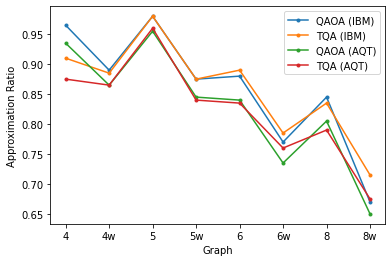

In [78]:
df_sim = sim_ar_df.iloc[:, 0:2]
df_sim.rename(columns={'QAOA': 'QAOA (IBM)', 'TQA-QAOA': 'TQA (IBM)'}, inplace=True)
df_aqt = sim_aqt_ar_df.iloc[:, 0:2]
df_aqt.rename(columns={'QAOA': 'QAOA (AQT)', 'TQA-QAOA': 'TQA (AQT)'}, inplace=True)
df = pd.concat( [df_sim, df_aqt], axis=1 )
df.plot(marker='.', ylabel="Approximation Ratio", xlabel="Graph")

In [79]:
df

,QAOA (IBM),TQA (IBM),QAOA (AQT),TQA (AQT)
Graph,,,,
4,0.965,0.910,0.935,0.875
4w,0.890,0.885,0.865,0.865
5,0.980,0.980,0.955,0.960
5w,0.875,0.875,0.845,0.840
6,0.880,0.890,0.840,0.835
6w,0.770,0.785,0.735,0.760
8,0.845,0.835,0.805,0.790
8w,0.670,0.715,0.650,0.675


In [80]:
print(df.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  QAOA (IBM) &  TQA (IBM) &  QAOA (AQT) &  TQA (AQT) \\
Graph &             &            &             &            \\
\midrule
4     &       0.965 &      0.910 &       0.935 &      0.875 \\
4w    &       0.890 &      0.885 &       0.865 &      0.865 \\
5     &       0.980 &      0.980 &       0.955 &      0.960 \\
5w    &       0.875 &      0.875 &       0.845 &      0.840 \\
6     &       0.880 &      0.890 &       0.840 &      0.835 \\
6w    &       0.770 &      0.785 &       0.735 &      0.760 \\
8     &       0.845 &      0.835 &       0.805 &      0.790 \\
8w    &       0.670 &      0.715 &       0.650 &      0.675 \\
\bottomrule
\end{tabular}



TQA ist vor allem bei gewichteten Graphen besser und mit zunehmender Anzahl der Knoten auch.
Sehr schön an den letzten beiden Graphen zu sehen 

### Vergleich EM-Methoden bei IBM im Detail

<AxesSubplot:xlabel='Graph', ylabel='Approximation Ratio'>

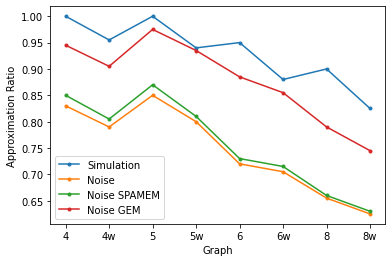

In [81]:
sim = sim_init_ar_df.iloc[:,0:1]
sim.rename(columns={'QAOA': 'Simulation'}, inplace=True)

noise = noise_init_ar_df.iloc[:,0:1]
noise.rename(columns={'QAOA': 'Noise'}, inplace=True)

noise_em = noise_init_em_ar_df.iloc[:,0:1]
noise_em.rename(columns={'QAOA': 'Noise SPAMEM'}, inplace=True)

noise_gem = noise_init_gem_ar_df.iloc[:,0:1]
noise_gem.rename(columns={'QAOA': 'Noise GEM'}, inplace=True)

df = pd.concat([sim, noise, noise_em, noise_gem], axis=1)
df.plot(marker='.', ylabel="Approximation Ratio", xlabel="Graph")

In [82]:
df

,Simulation,Noise,Noise SPAMEM,Noise GEM
Graph,,,,
4,1.000,0.830,0.850,0.945
4w,0.955,0.790,0.805,0.905
5,1.000,0.850,0.870,0.975
5w,0.940,0.800,0.810,0.935
6,0.950,0.720,0.730,0.885
6w,0.880,0.705,0.715,0.855
8,0.900,0.655,0.660,0.790
8w,0.825,0.625,0.630,0.745


In [83]:
print(df.mean())
print()
print(f"Noise - SPAMEM: {(df.mean()[1] - df.mean()[2]):.3f}")
print(f"Noise - GEM: {(df.mean()[1] - df.mean()[3]):.3f}")
print(f"SPAMEM - GEM: {(df.mean()[2] - df.mean()[3]):.3f}")
print(f"SIM - Noise: {(df.mean()[0] - df.mean()[1]):.3f}")
print(f"SIM - SPAMEM: {(df.mean()[0] - df.mean()[2]):.3f}")
print(f"SIM - GEM: {(df.mean()[0] - df.mean()[3]):.3f}")

Simulation      0.931250
Noise           0.746875
Noise SPAMEM    0.758750
Noise GEM       0.879375
dtype: float64

Noise - SPAMEM: -0.012
Noise - GEM: -0.133
SPAMEM - GEM: -0.121
SIM - Noise: 0.184
SIM - SPAMEM: 0.172
SIM - GEM: 0.052


In [84]:
print(df.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  Simulation &  Noise &  Noise SPAMEM &  Noise GEM \\
Graph &             &        &               &            \\
\midrule
4     &       1.000 &  0.830 &         0.850 &      0.945 \\
4w    &       0.955 &  0.790 &         0.805 &      0.905 \\
5     &       1.000 &  0.850 &         0.870 &      0.975 \\
5w    &       0.940 &  0.800 &         0.810 &      0.935 \\
6     &       0.950 &  0.720 &         0.730 &      0.885 \\
6w    &       0.880 &  0.705 &         0.715 &      0.855 \\
8     &       0.900 &  0.655 &         0.660 &      0.790 \\
8w    &       0.825 &  0.625 &         0.630 &      0.745 \\
\bottomrule
\end{tabular}



In [85]:
ibm_noise_qaoa = pd.DataFrame(df['Noise'])
ibm_noise_qaoa.rename(columns={'Noise': 'Noise IBM'}, inplace=True)

### Vergleich EM-Methoden bei IBM im Detail (WarmStart)

<AxesSubplot:xlabel='Graph', ylabel='Approximation Ratio'>

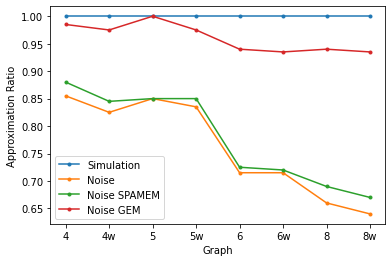

In [86]:
sim = sim_init_ar_df.iloc[:,2:3]
sim.rename(columns={'WS-QAOA': 'Simulation'}, inplace=True)

noise = noise_init_ar_df.iloc[:,2:3]
noise.rename(columns={'WS-QAOA': 'Noise'}, inplace=True)

noise_em = noise_init_em_ar_df.iloc[:,2:3]
noise_em.rename(columns={'WS-QAOA': 'Noise SPAMEM'}, inplace=True)

noise_gem = noise_init_gem_ar_df.iloc[:,2:3]
noise_gem.rename(columns={'WS-QAOA': 'Noise GEM'}, inplace=True)

df = pd.concat([sim, noise, noise_em, noise_gem], axis=1)
df.plot(marker='.', ylabel="Approximation Ratio", xlabel="Graph")

In [87]:
df

,Simulation,Noise,Noise SPAMEM,Noise GEM
Graph,,,,
4,1.0,0.855,0.880,0.985
4w,1.0,0.825,0.845,0.975
5,1.0,0.850,0.850,1.000
5w,1.0,0.835,0.850,0.975
6,1.0,0.715,0.725,0.940
6w,1.0,0.715,0.720,0.935
8,1.0,0.660,0.690,0.940
8w,1.0,0.640,0.670,0.935


In [88]:
print(df.mean())
print()
print(f"Noise - SPAMEM: {(df.mean()[1] - df.mean()[2]):.3f}")
print(f"Noise - GEM: {(df.mean()[1] - df.mean()[3]):.3f}")
print(f"SPAMEM - GEM: {(df.mean()[2] - df.mean()[3]):.3f}")
print(f"SIM - Noise: {(df.mean()[0] - df.mean()[1]):.3f}")
print(f"SIM - SPAMEM: {(df.mean()[0] - df.mean()[2]):.3f}")
print(f"SIM - GEM: {(df.mean()[0] - df.mean()[3]):.3f}")

Simulation      1.000000
Noise           0.761875
Noise SPAMEM    0.778750
Noise GEM       0.960625
dtype: float64

Noise - SPAMEM: -0.017
Noise - GEM: -0.199
SPAMEM - GEM: -0.182
SIM - Noise: 0.238
SIM - SPAMEM: 0.221
SIM - GEM: 0.039


In [89]:
print(df.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  Simulation &  Noise &  Noise SPAMEM &  Noise GEM \\
Graph &             &        &               &            \\
\midrule
4     &         1.0 &  0.855 &         0.880 &      0.985 \\
4w    &         1.0 &  0.825 &         0.845 &      0.975 \\
5     &         1.0 &  0.850 &         0.850 &      1.000 \\
5w    &         1.0 &  0.835 &         0.850 &      0.975 \\
6     &         1.0 &  0.715 &         0.725 &      0.940 \\
6w    &         1.0 &  0.715 &         0.720 &      0.935 \\
8     &         1.0 &  0.660 &         0.690 &      0.940 \\
8w    &         1.0 &  0.640 &         0.670 &      0.935 \\
\bottomrule
\end{tabular}



In [90]:
ibm_noise_ws = pd.DataFrame(df['Noise'])
ibm_noise_ws.rename(columns={'Noise': 'Noise IBM'}, inplace=True)

### Vergleich EM-Methoden bei AQT im Detail (QAOA)

<AxesSubplot:xlabel='Graph', ylabel='Approximation Ratio'>

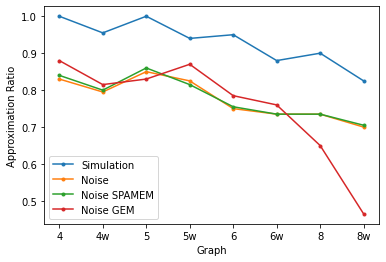

In [91]:
sim_aqt = sim_aqt_init_ar_df.iloc[:,0:1]
sim_aqt.rename(columns={'QAOA': 'Simulation'}, inplace=True)

noise_aqt = noise_aqt_init_ar_df.iloc[:,0:1]
noise_aqt.rename(columns={'QAOA': 'Noise'}, inplace=True)

noise_aqt_em = noise_aqt_init_em_ar_df.iloc[:,0:1]
noise_aqt_em.rename(columns={'QAOA': 'Noise SPAMEM'}, inplace=True)

noise_aqt_gem = noise_aqt_init_gem_ar_df.iloc[:,0:1]
noise_aqt_gem.rename(columns={'QAOA': 'Noise GEM'}, inplace=True)

df = pd.concat([sim_aqt, noise_aqt, noise_aqt_em, noise_aqt_gem], axis=1)
df.plot(marker='.', ylabel="Approximation Ratio", xlabel="Graph")

In [92]:
df

,Simulation,Noise,Noise SPAMEM,Noise GEM
Graph,,,,
4,1.000,0.830,0.840,0.880
4w,0.955,0.795,0.800,0.815
5,1.000,0.850,0.860,0.830
5w,0.940,0.825,0.815,0.870
6,0.950,0.750,0.755,0.785
6w,0.880,0.735,0.735,0.760
8,0.900,0.735,0.735,0.650
8w,0.825,0.700,0.705,0.465


In [93]:
print(df.mean())
print()
print(f"Noise - SPAMEM: {(df.mean()[1] - df.mean()[2]):.3f}")
print(f"Noise - GEM: {(df.mean()[1] - df.mean()[3]):.3f}")
print(f"SPAMEM - GEM: {(df.mean()[2] - df.mean()[3]):.3f}")
print(f"SIM - Noise: {(df.mean()[0] - df.mean()[1]):.3f}")
print(f"SIM - SPAMEM: {(df.mean()[0] - df.mean()[2]):.3f}")
print(f"SIM - GEM: {(df.mean()[0] - df.mean()[3]):.3f}")

Simulation      0.931250
Noise           0.777500
Noise SPAMEM    0.780625
Noise GEM       0.756875
dtype: float64

Noise - SPAMEM: -0.003
Noise - GEM: 0.021
SPAMEM - GEM: 0.024
SIM - Noise: 0.154
SIM - SPAMEM: 0.151
SIM - GEM: 0.174


In [94]:
print(df.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  Simulation &  Noise &  Noise SPAMEM &  Noise GEM \\
Graph &             &        &               &            \\
\midrule
4     &       1.000 &  0.830 &         0.840 &      0.880 \\
4w    &       0.955 &  0.795 &         0.800 &      0.815 \\
5     &       1.000 &  0.850 &         0.860 &      0.830 \\
5w    &       0.940 &  0.825 &         0.815 &      0.870 \\
6     &       0.950 &  0.750 &         0.755 &      0.785 \\
6w    &       0.880 &  0.735 &         0.735 &      0.760 \\
8     &       0.900 &  0.735 &         0.735 &      0.650 \\
8w    &       0.825 &  0.700 &         0.705 &      0.465 \\
\bottomrule
\end{tabular}



In [95]:
aqt_noise_qaoa = pd.DataFrame(df['Noise'])
aqt_noise_qaoa.rename(columns={'Noise': 'Noise AQT'}, inplace=True)

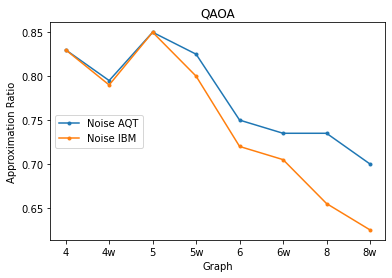

In [96]:
df = pd.concat([aqt_noise_qaoa, ibm_noise_qaoa], axis=1)
df.plot(marker='.', ylabel="Approximation Ratio", xlabel="Graph", title="QAOA")
plt.legend(loc=6)
plt.show()

In [97]:
df.mean()

Noise AQT    0.777500
Noise IBM    0.746875
dtype: float64

In [98]:
aqt_noise_qaoa['Noise AQT'] - ibm_noise_qaoa['Noise IBM']

Graph
4     0.000
4w    0.005
5     0.000
5w    0.025
6     0.030
6w    0.030
8     0.080
8w    0.075
dtype: float64

### Vergleich EM-Methoden bei AQT im Detail (WarmStart)

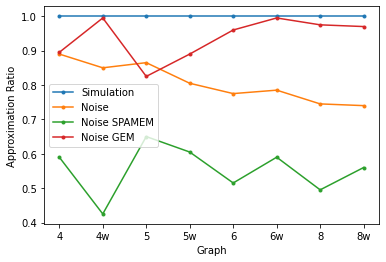

In [99]:
sim = sim_aqt_init_ar_df.iloc[:,2:3]
sim.rename(columns={'WS-QAOA': 'Simulation'}, inplace=True)

noise = noise_aqt_init_ar_df.iloc[:,2:3]
noise.rename(columns={'WS-QAOA': 'Noise'}, inplace=True)

noise_em = noise_aqt_init_em_ar_df.iloc[:,2:3]
noise_em.rename(columns={'WS-QAOA': 'Noise SPAMEM'}, inplace=True)

noise_gem = noise_aqt_init_gem_ar_df.iloc[:,2:3]
noise_gem.rename(columns={'WS-QAOA': 'Noise GEM'}, inplace=True)

df = pd.concat([sim, noise, noise_em, noise_gem], axis=1)
df.plot(marker='.', ylabel="Approximation Ratio", xlabel="Graph")
plt.legend(loc=6)
plt.show()

In [100]:
df

,Simulation,Noise,Noise SPAMEM,Noise GEM
Graph,,,,
4,1.0,0.890,0.590,0.895
4w,1.0,0.850,0.425,0.995
5,1.0,0.865,0.650,0.825
5w,1.0,0.805,0.605,0.890
6,1.0,0.775,0.515,0.960
6w,1.0,0.785,0.590,0.995
8,1.0,0.745,0.495,0.975
8w,1.0,0.740,0.560,0.970


In [101]:
print(df.mean())
print()
print(f"Noise - SPAMEM: {(df.mean()[1] - df.mean()[2]):.3f}")
print(f"Noise - GEM: {(df.mean()[1] - df.mean()[3]):.3f}")
print(f"SPAMEM - GEM: {(df.mean()[2] - df.mean()[3]):.3f}")
print(f"SIM - Noise: {(df.mean()[0] - df.mean()[1]):.3f}")
print(f"SIM - SPAMEM: {(df.mean()[0] - df.mean()[2]):.3f}")
print(f"SIM - GEM: {(df.mean()[0] - df.mean()[3]):.3f}")

Simulation      1.000000
Noise           0.806875
Noise SPAMEM    0.553750
Noise GEM       0.938125
dtype: float64

Noise - SPAMEM: 0.253
Noise - GEM: -0.131
SPAMEM - GEM: -0.384
SIM - Noise: 0.193
SIM - SPAMEM: 0.446
SIM - GEM: 0.062


In [102]:
print(df.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  Simulation &  Noise &  Noise SPAMEM &  Noise GEM \\
Graph &             &        &               &            \\
\midrule
4     &         1.0 &  0.890 &         0.590 &      0.895 \\
4w    &         1.0 &  0.850 &         0.425 &      0.995 \\
5     &         1.0 &  0.865 &         0.650 &      0.825 \\
5w    &         1.0 &  0.805 &         0.605 &      0.890 \\
6     &         1.0 &  0.775 &         0.515 &      0.960 \\
6w    &         1.0 &  0.785 &         0.590 &      0.995 \\
8     &         1.0 &  0.745 &         0.495 &      0.975 \\
8w    &         1.0 &  0.740 &         0.560 &      0.970 \\
\bottomrule
\end{tabular}



In [103]:
aqt_noise_ws = pd.DataFrame(df['Noise'])
aqt_noise_ws.rename(columns={'Noise': 'Noise AQT'}, inplace=True)

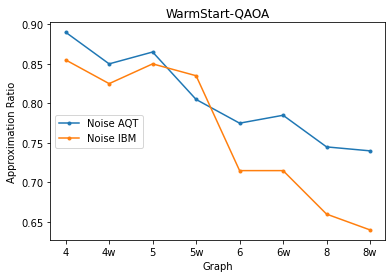

In [104]:
df = pd.concat([aqt_noise_ws, ibm_noise_ws], axis=1)
df.plot(marker='.', ylabel="Approximation Ratio", xlabel="Graph", title="WarmStart-QAOA")
plt.legend(loc=6)
plt.show()

In [105]:
aqt_noise_ws['Noise AQT'] - ibm_noise_ws['Noise IBM']

Graph
4     0.035
4w    0.025
5     0.015
5w   -0.030
6     0.060
6w    0.070
8     0.085
8w    0.100
dtype: float64

In [106]:
df.mean()

Noise AQT    0.806875
Noise IBM    0.761875
dtype: float64

### D-Wave

In [107]:
import pickle
name = 'dwave/result_benchmark_5_dict'
def load_dict(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [108]:
dwave_results = load_dict(name)
temp = {}
for key, value in dwave_results.items():
    m, r, ar = value
    if '_w' in key:
        name = key.split('0')[1][0] + 'w'
    else:
        name = key.split('0')[1][0]
    temp[name] = (np.median(m), np.median(r), np.median(ar))
dwave_results = {}
for key in sorted(temp.keys()):
    dwave_results[key] = temp[key]


In [109]:
opt = pd.DataFrame([-4., -21, -4, -35, -7, -31, -10, 53.], index=['4','4w','5','5w','6','6w','8','8w'], columns=["Optimal MaxCut"])
opt.index.name = "Graph"
opt

,Optimal MaxCut
Graph,
4,-4.0
4w,-21.0
5,-4.0
5w,-35.0
6,-7.0
6w,-31.0
8,-10.0
8w,53.0


In [110]:
dwave_results_df = pd.DataFrame.from_dict(dwave_results, orient='index', columns=['Expectation Value', 'Ratio r', 'Approximation Ratio'])
dwave_results_df = dwave_results_df.fillna(0).round(2)
dwave_results_df = opt.join(dwave_results_df)
dwave_results_df.index.name = "Graph"
dwave_results_df

,Optimal MaxCut,Expectation Value,Ratio r,Approximation Ratio
Graph,,,,
4,-4.0,-4.00,0.00,1.00
4w,-21.0,-19.65,0.91,0.98
5,-4.0,-4.00,0.00,1.00
5w,-35.0,-34.38,0.87,0.98
6,-7.0,-7.00,1.00,1.00
6w,-31.0,-30.81,0.97,0.99
8,-10.0,-10.00,0.97,1.00
8w,53.0,-52.43,0.92,0.99


In [111]:
print(dwave_results_df.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  Optimal MaxCut &  Expectation Value &  Ratio r &  Approximation Ratio \\
Graph &                 &                    &          &                      \\
\midrule
4     &            -4.0 &              -4.00 &     0.00 &                 1.00 \\
4w    &           -21.0 &             -19.65 &     0.91 &                 0.98 \\
5     &            -4.0 &              -4.00 &     0.00 &                 1.00 \\
5w    &           -35.0 &             -34.38 &     0.87 &                 0.98 \\
6     &            -7.0 &              -7.00 &     1.00 &                 1.00 \\
6w    &           -31.0 &             -30.81 &     0.97 &                 0.99 \\
8     &           -10.0 &             -10.00 &     0.97 &                 1.00 \\
8w    &            53.0 &             -52.43 &     0.92 &                 0.99 \\
\bottomrule
\end{tabular}



In [112]:
dwave_ar = pd.DataFrame(dwave_results_df.iloc[:,3:4])
dwave_ar.rename(columns={'Approximation Ratio': 'Advantage™'}, inplace=True)
dwave_ar.index.name = "Graph"
dwave_ar

,Advantage™
Graph,
4,1.00
4w,0.98
5,1.00
5w,0.98
6,1.00
6w,0.99
8,1.00
8w,0.99


### Vergleich D-Wave vs IBM vs AQT (SIM) Approximation Ratio

In [113]:
ibm_sim_ar_df = sim_ar_df.add_suffix(' (IBM)')
aqt_sim_aqt_ar_df = sim_aqt_ar_df.add_suffix(' (AQT)')
#dwave_ar = dwave_ar.add_suffix(' (D-Wave)')
results_all_sim = pd.concat([dwave_ar, ibm_sim_ar_df, aqt_sim_aqt_ar_df], axis=1)
results_all_sim.index.name = "Graph"
results_all_sim

,Advantage™,QAOA (IBM),TQA-QAOA (IBM),WS-QAOA (IBM),R-QAOA (IBM),WS-R-QAOA (IBM),QAOA (AQT),TQA-QAOA (AQT),WS-QAOA (AQT),R-QAOA (AQT),WS-R-QAOA (AQT)
Graph,,,,,,,,,,,
4,1.00,0.965,0.910,1.0,1.0,1.00,0.935,0.875,1.0,1.00,1.00
4w,0.98,0.890,0.885,1.0,1.0,1.00,0.865,0.865,1.0,1.00,1.00
5,1.00,0.980,0.980,1.0,1.0,1.00,0.955,0.960,1.0,1.00,1.00
5w,0.98,0.875,0.875,1.0,1.0,1.00,0.845,0.840,1.0,1.00,1.00
6,1.00,0.880,0.890,1.0,1.0,1.00,0.840,0.835,1.0,1.00,1.00
6w,0.99,0.770,0.785,1.0,1.0,1.00,0.735,0.760,1.0,1.00,1.00
8,1.00,0.845,0.835,1.0,1.0,1.00,0.805,0.790,1.0,1.00,1.00
8w,0.99,0.670,0.715,1.0,1.0,0.98,0.650,0.675,1.0,0.98,0.98


In [114]:
print(results_all_sim.to_latex())

\begin{tabular}{lrrrrrrrrrrr}
\toprule
{} &  Advantage™ &  QAOA (IBM) &  TQA-QAOA (IBM) &  WS-QAOA (IBM) &  R-QAOA (IBM) &  WS-R-QAOA (IBM) &  QAOA (AQT) &  TQA-QAOA (AQT) &  WS-QAOA (AQT) &  R-QAOA (AQT) &  WS-R-QAOA (AQT) \\
Graph &             &             &                 &                &               &                  &             &                 &                &               &                  \\
\midrule
4     &        1.00 &       0.965 &           0.910 &            1.0 &           1.0 &             1.00 &       0.935 &           0.875 &            1.0 &          1.00 &             1.00 \\
4w    &        0.98 &       0.890 &           0.885 &            1.0 &           1.0 &             1.00 &       0.865 &           0.865 &            1.0 &          1.00 &             1.00 \\
5     &        1.00 &       0.980 &           0.980 &            1.0 &           1.0 &             1.00 &       0.955 &           0.960 &            1.0 &          1.00 &             1.00 \\


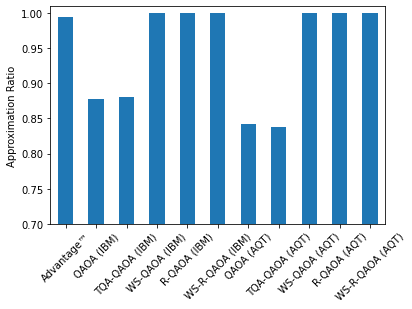

In [115]:
results_all_sim.median().plot(kind='bar', ylim=[0.7,1.01], ylabel="Approximation Ratio")
plt.xticks(rotation=45)
plt.show()

In [116]:
# drop TQA-Axis -> nicht vergleichbar mit QAOA, da fixe Startpunkte
ibm_noise_ar_df_o = noise_init_gem_ar_df.drop('TQA-QAOA', axis=1)
ibm_noise_ar_df_o = ibm_noise_ar_df_o.add_suffix(' (IBM)')
aqt_noise_aqt_ar_df_o = noise_aqt_init_gem_ar_df.drop('TQA-QAOA', axis=1)
aqt_noise_aqt_ar_df_o = aqt_noise_aqt_ar_df_o.add_suffix(' (AQT)')

results_all_noise_o = pd.concat([dwave_ar, ibm_noise_ar_df_o, aqt_noise_aqt_ar_df_o], axis=1)
results_all_noise_o.index.name = "Graph"
results_all_noise_o

,Advantage™,QAOA (IBM),WS-QAOA (IBM),R-QAOA (IBM),WS-R-QAOA (IBM),QAOA (AQT),WS-QAOA (AQT),R-QAOA (AQT),WS-R-QAOA (AQT)
Graph,,,,,,,,,
4,1.00,0.945,0.985,0.000,1.0,0.880,0.895,0.875,1.000
4w,0.98,0.905,0.975,1.000,1.0,0.815,0.995,0.850,0.975
5,1.00,0.975,1.000,1.000,1.0,0.830,0.825,1.000,1.000
5w,0.98,0.935,0.975,0.945,1.0,0.870,0.890,0.600,1.000
6,1.00,0.885,0.940,0.430,1.0,0.785,0.960,0.785,1.000
6w,0.99,0.855,0.935,1.000,1.0,0.760,0.995,0.970,1.000
8,1.00,0.790,0.940,0.750,1.0,0.650,0.975,0.750,1.000
8w,0.99,0.745,0.935,1.000,1.0,0.465,0.970,0.880,1.000


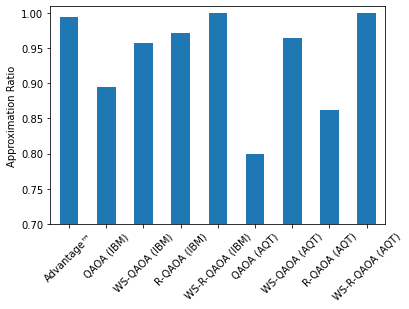

In [117]:
results_all_noise_o.median().plot(kind='bar', ylim=[0.7,1.01], ylabel="Approximation Ratio", )
plt.xticks(rotation=45)
plt.show()

In [118]:
print(results_all_noise_o.to_latex())

\begin{tabular}{lrrrrrrrrr}
\toprule
{} &  Advantage™ &  QAOA (IBM) &  WS-QAOA (IBM) &  R-QAOA (IBM) &  WS-R-QAOA (IBM) &  QAOA (AQT) &  WS-QAOA (AQT) &  R-QAOA (AQT) &  WS-R-QAOA (AQT) \\
Graph &             &             &                &               &                  &             &                &               &                  \\
\midrule
4     &        1.00 &       0.945 &          0.985 &         0.000 &              1.0 &       0.880 &          0.895 &         0.875 &            1.000 \\
4w    &        0.98 &       0.905 &          0.975 &         1.000 &              1.0 &       0.815 &          0.995 &         0.850 &            0.975 \\
5     &        1.00 &       0.975 &          1.000 &         1.000 &              1.0 &       0.830 &          0.825 &         1.000 &            1.000 \\
5w    &        0.98 &       0.935 &          0.975 &         0.945 &              1.0 &       0.870 &          0.890 &         0.600 &            1.000 \\
6     &        1.00 &      